<h1><center>PCA for Identifying Key Variables in Donor Funding Analysis<center><h1>


<img src="files/images/logo.svg">

### 1. Introduction

#### a).Objective
The objective of this task is to develop a model to address the growing number of referrals at the Anderson Cancer Center. The model's first step is to identify essential variables for securing donor funding. Principal Component Analysis (PCA) has been chosen as the most suitable technique for this task. The following tasks will be implemented:
- PCA Implementation:

Utilize PCA to demonstrate how essential variables can be acquired from the cancer dataset available from sklearn.datasets.

- Dimensionality Reduction:

Reduce the dataset into 2 PCA components for the project.

- Implement logistic regression for prediction.

Implement a logistic regression for a defined prediction on the dataset.

#### b). Background
Over the past few months, the number of referral cases at the Anderson Cancer Center has been growing rapidly. In order to provide a comprehensive and integrated health service for the people,the center has identified the need for using data to diagnose this growth, and to communicate the findings to simulate donor funding. This study aims to develop a model that will aid the center in addressing the growing number of referrals and identify the key variables that will appeal to donor funding.

#### c). An Overview of PCA
Principal Component Analysis (PCA) is a dimensionality reduction technique that is used to reduce the number of dimensions in a large dataset while retaining the original information. The "Curse of Dimensionality" is a common problem in machine learning. Many dimensions in a dataset often lead to overfitting (where a model fits too closely) and or multicollinearity (where variables are related, affecting model performance). PCA irons out these problems by extracting the most informative features from large datasets while preserving the most relevant information from the initial dataset (https://www.ibm.com/topics/principal-component-analysis).

This statistical technique involves both linear algebra and matrix operations, and it transforms the original dataset into a new coordinate system that is structured by the principal components. The eigenvectors and eigenvalues from the covariance matrix that underpin the principal components allow for the analysis of these linear transformations.
<img src="files/images/pca.png">
Figure: Illustration of PCA. (Source: IBM)

### 2. Data Exploration
We will be using the cancer dataset available from sklearn.datasets. We start by downloading the dataset.

In [10]:
# Import the required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset from sklearn
cancer_data = load_breast_cancer()

# Create a DataFrame with the features and target variable
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_data.target

# Display the first five rows
cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


The breast cancer dataset has 30 columns. The dataset characteristics are defined as:

Source (https://scikit-learn.org/1.5/datasets/toy_dataset.html#breast-cancer-dataset)

- Number of Instances: 569

- Number of Attributes: 30 numeric, predictive attributes and the class

Attribute Information:

- radius (mean of distances from center to points on the perimeter)

- texture (standard deviation of gray-scale values)

- perimeter

- area

- smoothness (local variation in radius lengths)

- compactness (perimeter^2 / area - 1.0)

- concavity (severity of concave portions of the contour)

- concave points (number of concave portions of the contour)

- symmetry

- fractal dimension (“coastline approximation” - 1)

The target column indicates whether the case is malignant (0) or benign (1). Benign tumors are noncancerous, while malignant tumors are cancerous.

In [5]:
# Check the dimensions of the dataframe
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### 3. Data Cleaning and Preprocessing

##### Handle Missing Value

In [8]:
# Check if the dataset has missing values
cancer_df.isnull().values.any()

False

There are no missing values in the dataset. Next we will scale and standardize the data since PCA is sensitive to the scale of the data.

##### Scaling and Standardization
Normalization and scaling are essential steps in data preprocessing. Scaling data allows us to transform the data into a new scale without changing the shape of the distribution. It is useful for data that has a wide range of measurements. We will use the Standardscaler class from the sklearn module.

In [9]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(cancer_df)

# create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=cancer_df.columns)

print("Raw Data")
print(cancer_df)
print("\nNormalized Data")
print(scaled_df)

Raw Data
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave po

### 4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA), is helpful in "taking a peak" at the data before any assumption are made about the data. It can assist in identifying errors, detect outliers, identify trends and patterns and check for relationship between varibales. Exploratory analysis is essential in ensuring that the results are valid and applicable to the  business outcomes and goals. EDA also assists the stakeholders by confirming that the relevant questions are being asked. We will visualize the key features and conduct a correlation analysis to identify which of the varibales are strongly correlated.

In [12]:
# We create functions to plot histograms, box plots and heat map, then call them on the dataset
# to visualize the results

In [17]:
# Set a style for the visualization
plt.style.use('seaborn-whitegrid')

#We will sample a subset since there are too many columns
sample_features = scaled_df.columns[:-1]  # All features except 'target'

# Plot histograms for each feature
def plot_histograms(data, features):
    plt.figure(figsize=(16, 20))
    for i, feature in enumerate(features):
        plt.subplot(6, 5, i + 1)
        plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
        plt.title(feature, fontsize=10)
        plt.xlabel("")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Plot box plots for each feature
def plot_boxplots(data, features):
    plt.figure(figsize=(16, 20))
    for i, feature in enumerate(features):
        plt.subplot(6, 5, i + 1)
        sns.boxplot(y=data[feature], color='lightcoral')
        plt.title(feature, fontsize=10)
        plt.xlabel("")
        plt.ylabel("Value")
    plt.tight_layout()
    plt.show()

# Plot correlation heatmap
def plot_correlation_heatmap(data):
    plt.figure(figsize=(12, 10))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
    plt.title("Correlation Heatmap of Cancer Dataset Features")
    plt.show()


##### Visualize Features using a histogram

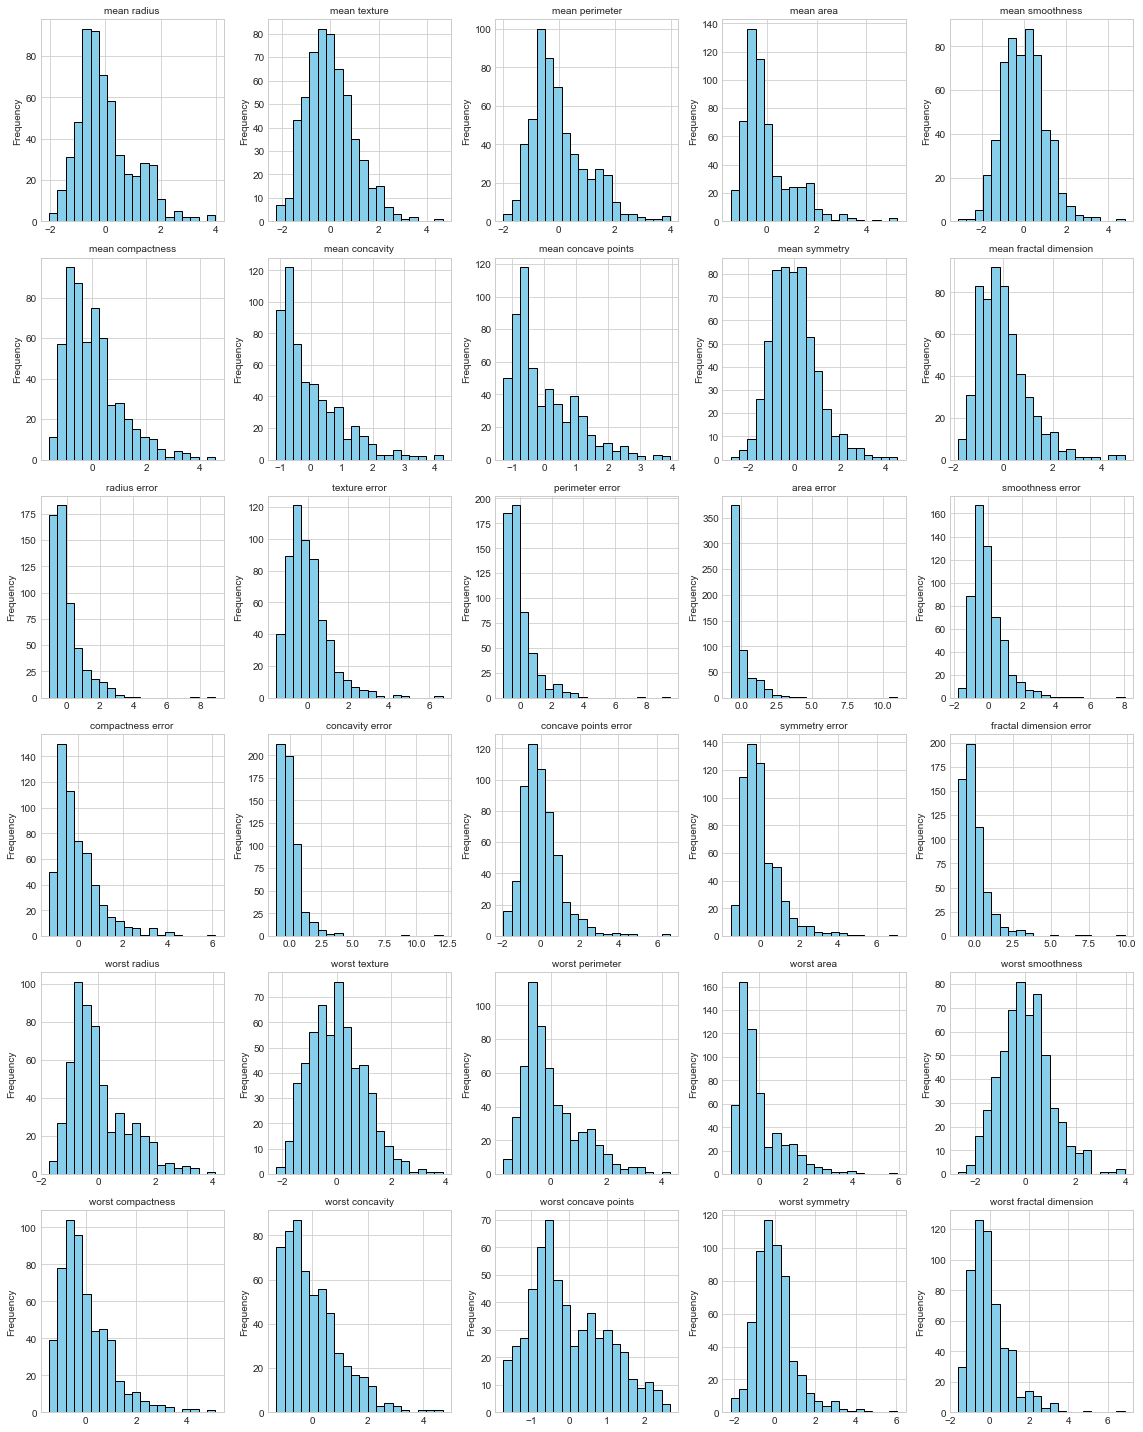

In [18]:
plot_histograms(scaled_df, sample_features)

Histograms are important in showing the distribution of each of the features, to understand if the data is skewed or is normally distributed. Histograms also indicate the presence or absence of outliers.
- Skeweness:
Skeweness measures the symmetry of a varibale distribution. Understanding the skewness in our dataset provides insights into how the data values are spread around the mean and has a bearing on the choice of statistical techniques and the type of data transformation to apply.
Our dataset has a few right-skewed distributions, such as *mean area*, *worst area*, and *mean perimeter*. This suggests that most values are concentrated on the lower ranges. 
Features like the *mean smoothness* and *mean compactness* are more normally distributed.

In [21]:
# We can use pandas to calculate the skewness in our dataset
scaled_df.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

Most of the features are beyond -1 and 1 — indicating high skeweness.

##### Visualize the Boxplots

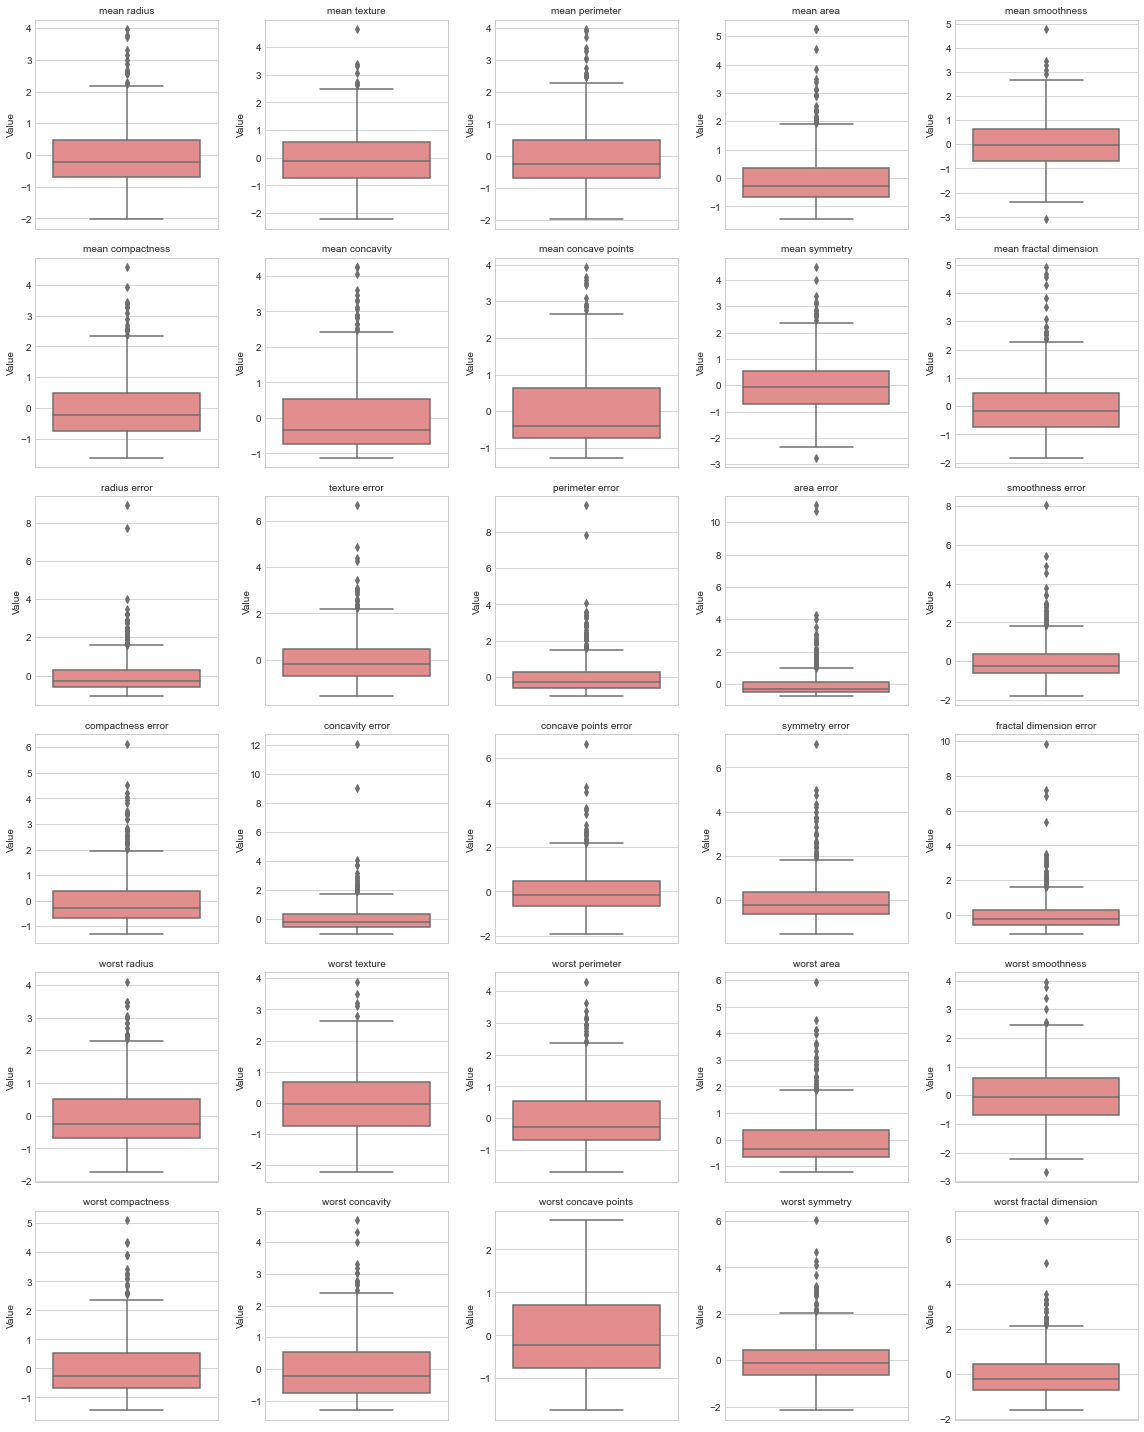

In [22]:
plot_boxplots(scaled_df, sample_features)

- Boxplots:
Box plot are helpful in showing the median (central line in the box) and spread (range of the box). Features like *worst area* and *mean area* have large interquartile ranges.

##### Correlation Analysis

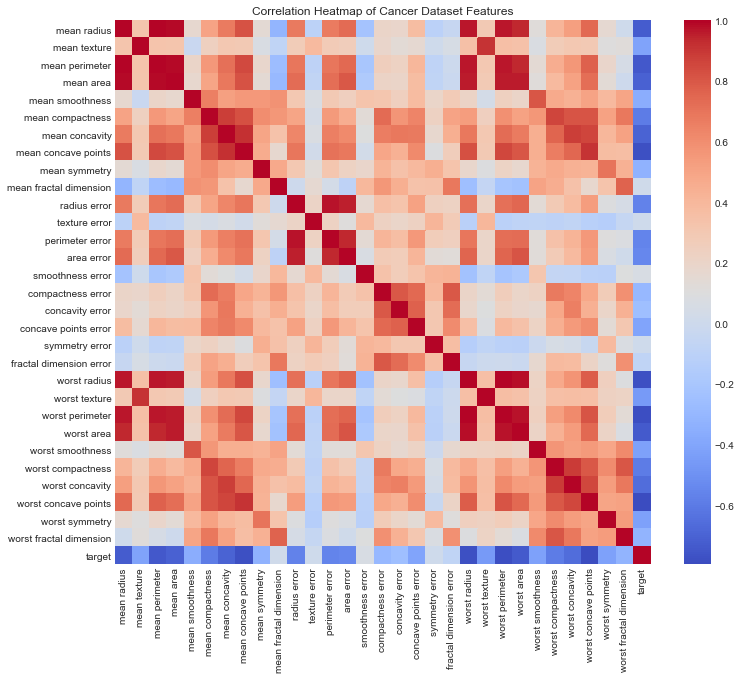

In [23]:
plot_correlation_heatmap(scaled_df)

- Correlation analysis helps in quantifing the degree to which two variables are related to each other. In the cancer dataset, there are many highly correlated pairs, such as mean radius with mean perimeter, and worst radius with worst area.
- The implications for high correlations is redundancy. PCA a suitable choice to reduce dimensionality, as it will capture much of this overlapping information in fewer components.

### 5. Principal Component Analysis (PCA)

### 6. Visualizing Results

### 7. Interpretation and Key Variable Identification

### 8. Conclusion and Next Steps